# Regressione Lineare
by Elia Cellini

La scorsa lezione abbiamo introdotto il machine learning, una tecnica numerica che permette di approssiamare funzioni target $f(x)$ estrapolando la "conoscenza" da set di dati, e che si basa su tre ingredienti principali:

*   Il dataset $X$
*   Lo spazio delle ipotesi, uno spazio di funzioni dipendenti da un set di parametri $W$.
*   Algoritmo di learning

Durante la procedura di "addestramento", l'algoritmo di learning esplora lo spazio delle ipotesi testandolo sul dataset; se la procedura va a buon fine, l'output del programma sarà una funzione $g_W$ che approssima al meglio la funzione target $f$:
$$g_W(x)\simeq f(x)$$

In questo laboratorio affronteremo il primo modello di machine learning di questo minicorso: la **regressione lineare**. 

Consideriamo un dataset $X$ di N campioni $x_i\in \mathbb{R}^d$:
$$x_i=[x_i^1,x_i^2,...x_i^d]$$
e
$$X=\begin{pmatrix}
x_1^1 & ... & x_1^d\\
... & ... & ... \\
x_i^1 & ... & x_i^d \\
... & ... & ... \\
x_N^1 & ... & x_N^d
\end{pmatrix}$$


Testeremo questo modello su un semplice dataset lineare con $d=1$ in presenza di un rumore gaussiano, la funzione target dunque è una retta:
$$y=aX+b+\epsilon$$
dove $y, b\in \mathbb{R}$, e $\epsilon$ rappresenta un rumore Gaussiano.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Funione per generare dei dati distributi su una retta y=b*x+a con rumore
def mk_data(minR=-5,maxR=5, step=0.1, sigma=1):
    b = -5.0
    a = 3.0
    x = np.arange(minR,maxR,step)
    y = a*x + b + np.random.normal(0,sigma, len(x))
    x = x + np.random.normal(0,sigma, len(x))
    return  x, y

#Questa funzione aggiunge degli "outliner" (dei punti sbagliati) ai dati
def add_outliers(y,inc = 20.0):
    idx = np.argsort(y)
    y[idx[:2]] += inc
    y[idx[-2:]] -= inc
    return y
#Funzione per plottare 
def plotfit(X,y,W,title):
    p= plt.plot (X[:,1], y, 'bx')
    p= plt.plot (X[:,1], X.dot(W), 'r-')
    plt.title(title)
    plt.show()

Generiamo learning e test set:

In [4]:
s = 1.0
XL, yL = mk_data() # training sets
XT, yT = mk_data(minR=5,maxR=15)  # test sets

In [5]:
XL.shape

(100,)

In [6]:
yL.shape

(100,)

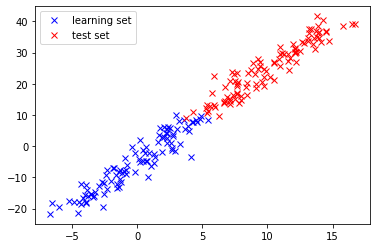

In [7]:
plt.plot(XL,yL,'bx',label='learning set');
plt.plot(XT,yT,'rx',label='test set')
plt.legend()

Lo spazio delle ipotesi della regressione lineare è un prodotto:
$$\hat{y}=g_w(x)=XW+b$$
dove $W \in \mathbb{R}^d$, $b\in \mathbb{R}$ e $\hat{y}\in \mathbb{R}$.
Dunque:
$$\hat{y}=\begin{pmatrix}
\hat{y}_1 \\
...  \\
\hat{y}_N
\end{pmatrix}=\begin{pmatrix}
x_1^1 & ... & x_1^d\\
... & ... & ... \\
x_i^1 & ... & x_i^d \\
... & ... & ... \\
x_N^1 & ... & x_N^d
\end{pmatrix} \begin{pmatrix}
w_1 \\
...  \\
w_d
\end{pmatrix}+b$$

Prima di addestrare il modello, è comodo "assorbire" il termine noto $b$ nei parametri $w$ aggiungendo una dimensione ad $x$ con valore fissato a $1$. Usando questa trasformazione:
$$X=\begin{pmatrix}
1 & x_1 \\
1 & ... \\
1 & x_i \\
1 & ... \\
1 & x_N 
\end{pmatrix}$$
e
$W \in \mathbb{R}^{2}$:
$$W=[b,m]^T=\begin{pmatrix}
b \\
w_1  \\
\end{pmatrix}$$
Dunque:
$$\hat{y}=XW$$


In [10]:
Xl=np.c_[np.ones(len(XL)),XL]
Xt=np.c_[np.ones(len(XT)),XT]
yL=yL.reshape(len(XL), 1)
yT=yT.reshape(len(XL), 1)

La loss function che minimizzeremo per addestrare il nostro algoritmo lineare è l'errore quadratico medio (MSE):
$$E(W)=L_{MSE}=\frac{1}{N}\sum_i^N(y_i-g_W(x_i))^2$$
In questo seplice caso, è possibile trovare una soluzione analitica:
$$w^*=(X^TX)^{-1}X^Ty$$
dove $X$ rappresenta il dataset, per noi Xl.


In [11]:
def NormReg(X,y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [12]:
Wnorm=NormReg(Xl,yL)
print(Wnorm)

[[-4.78191404]
 [ 2.78668638]]


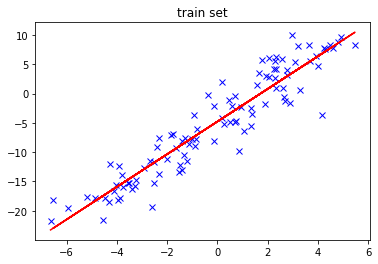

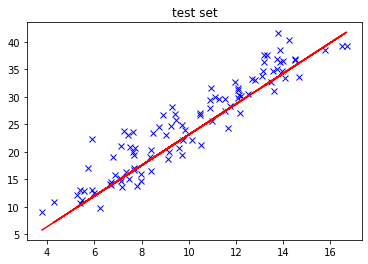

In [13]:
plotfit(Xl,yL,Wnorm, 'train set')
plotfit(Xt,yT,Wnorm, 'test set')  

**Gradient Descent**
Addestriamo il modello usando una discesa del gradiente:
$$
W(i+1) = W(i) - \eta\cdot \nabla_{W}E(W) \\
$$


*   Implementa in gradiente $\nabla_{W} E(W)=X^T(XW-y)$
*   Implementa un ciclo per addestrare il modello usando la discesa del gradiente
*   (Opzionale: Implementa lo "stochastic gradient descent" SGD, suddividi il dataset in "mini batch", ad es. 10 campioni, ed usali per aggionare i parametri. Al posto delle iterazioni ti conviene ragionare in "epoche", ovvero il numero di step di SGD necessari per "vedere" l'intero dataset) 



In [26]:
def gradL(X,y,w):
  
  return dw

In [27]:
def GD(X,y,i_max,eta):

  return w

In [ ]:
w=GD(Xl,yL,10,0.001)
print(w)

In [ ]:
plt.plot(Xt[:,1], yT, 'bx')
plt.plot(Xt[:,1], Xt.dot(w), 'g-')
plt.title('Prediction on Test Set')
plt.show()

### Soluzione

In [11]:
def gradL2(X,y,w):
    return X.T.dot((X.dot(w)-y))

In [12]:
def GD(grad, X, y,epochs,eta):
    n,d = X.shape
    w = np.zeros(d).reshape(d, 1)
    for e in range(epochs):
        w = w-eta*grad(X,y,w)
    return w

In [17]:
w=GD(gradL2,Xl,yL,5,0.001)
print(w)

[[-2.09279279]
 [ 2.70112728]]


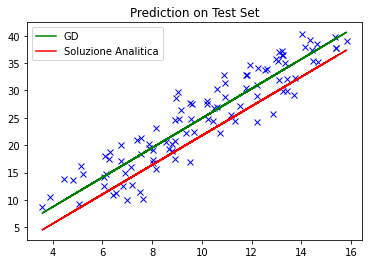

In [18]:
#results on test set
plt.show()
plt.plot(Xt[:,1], yT, 'bx')
plt.plot(Xt[:,1], Xt.dot(w), 'g-',label='GD')
plt.plot(Xt[:,1], Xt.dot(Wnorm), 'r-',label='Soluzione Analitica')
plt.legend()
plt.title('Prediction on Test Set')
plt.show()

#Loss function e inferenza statistica
https://arxiv.org/pdf/1803.08823.pdf

Usando l'inferenza statistica, possiamo dedurre la loss function $L_{MSE}$ studiando la posterior: 
$$p(W|X)$$
ovvero la distribuzione di probabibilità che condiziona i parametri W ai dati X.
Usando il teorema di Bayes:
$$p(W|X)=\frac{p(X|W)p(W)}{c}$$
dove $p(X|W)$ è generalmente chiamata likelihood, $p(W)$ è detta prior mentre $c$ è una costante di normalizzazione. Supponiamo che i target $y$ siano delle fluttuazioni i.i.d centrate sulle predizioni del modello, ovvero immaginiamo che la likelihood sia una produttoria di Gaussiane:
$$p(X|W)=∏_{i}^N\frac{1}{Z}e^{-\frac{\beta}{2}(y_i-\hat{y}_i)^2}=\frac{1}{Z}e^{-\frac{\beta}{2}\sum_{i}^N(y_i-\hat{y}_i)^2}=\frac{1}{Z}e^{-\frac{\beta N}{2}E(W)}$$
massimizzare questo oggetto equivale a minimizzare:
$$-\log p(X|W)={\frac{\beta}{2}\sum_{i}^N(y_i-\hat{y}_i)^2}+c=\frac{\beta N}{2}E(W)+c$$
ovvero la loss MSE. Nel caso in cui la prior è costante e dunque trascurabile, massimizzare la posterior equivale al principio di "Maximun Likelihood". 
$$w^*=max_Wp(X|W)$$

Ricordate il tradeoff tra bias e varianza? Le fluttuazioni misurate dal termine di varianza sono legate alla prior p(W) e possiamo tentare di controllarle durante la costruzione della loss. Immaginiamo che i parametri siano i.i.d:
$$p(W)=\frac{1}{Z}\prod_k e^{-\frac{\alpha}{2}w_k^2}$$
Dunque, se minimiziamo $-\log p(W|X)$ otteniamo una nuova loss "regolarizzata":
$$E_{\lambda}(W)=\frac{1}{N}\sum_i^N(y_i-\hat{y}_i)^2+\lambda\sum_k w_k^2$$
dove $\lambda=\frac{\alpha}{\beta}$ è un iperparametro. Il termine che abbiamo aggiunto si chiama regolarizzatore e, in questo caso, ha l'effetto di tenere "piccoli" i parametri.


### Esercizi
Aggiungiamo rumore e degli outliner ai dati.

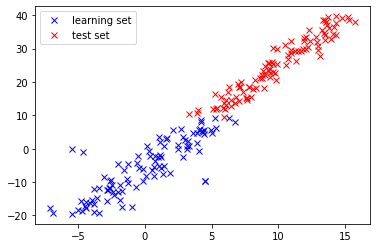

In [14]:
XL, yL = mk_data() # training sets
yL = add_outliers(yL)
XT, yT = mk_data(minR=5,maxR=15)  # test sets
Xl=np.c_[np.ones(len(XL)),XL]
Xt=np.c_[np.ones(len(XT)),XT]
yL=yL.reshape(len(XL), 1)
yT=yT.reshape(len(XL), 1)
plt.plot(XL,yL,'bx',label='learning set');
plt.plot(XT,yT,'rx',label='test set')
plt.legend()

Implementa e testa le seguenti loss:
   * $L_{MAE} = \frac{1}{N}\sum_{i=1}^N | y_i -g_W(x_i)| $

   * $L_{LC}= \frac{1}{N}\sum_{i=1}^N \ln [ \cosh (y_i -g_W(x_i)) ] $

e confrontane i risultati con $L_{MSE}$.


**Esercizio** Implementa i seguenti regolarizzatori:

*   $L_1=\lambda\sum_{k}|w_k|$ (Lasso)
*   $L_2=\lambda\sum_kw_k^2$ (Ridge)

e plotta la delle componenti di $w^*$ al variare di $\lambda$.

### Soluzioni

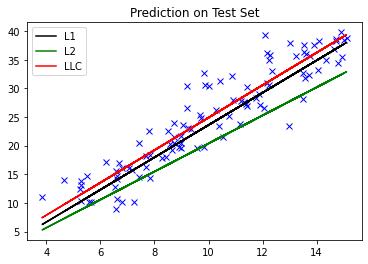

In [20]:
#Gradient of loss function
def gradL1(X,y,w):
    return X.T.dot(np.sign(X.dot(w)-y))
                   
def gradLC(X,y,w):
    D=y-X.dot(w)
    return (-X).T.dot((1/np.cosh(D))*np.sinh(D))
#training
wl1=GD(gradL1,Xl,yL,1000,0.0001)
wl2=GD(gradL2,Xl,yL,15,0.001)
wllc=GD(gradLC,Xl,yL,60,0.001)
#results on test set
plt.plot(Xt[:,1], yT, 'bx')
plt.plot(Xt[:,1], Xt.dot(wl1), 'k-', label='L1')
plt.plot(Xt[:,1], Xt.dot(wl2), 'g-',label='L2')
plt.plot(Xt[:,1], Xt.dot(wllc), 'r-',label='LLC')
plt.legend()
plt.title('Prediction on Test Set')
plt.show()